In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

In [6]:
results_path = '../src_results/3.csv'
if not os.path.exists(results_path):
    print(f"Error: File {results_path} not found. Run the C++ benchmark first!")
else:
    print("Data file found. Loading...")

Data file found. Loading...


In [3]:
df = pd.read_csv(results_path)

# Находим базовое время (1 поток) для каждого метода и размера
base_times = df[df['Threads'] == 1][['Method', 'Size', 'Time']].rename(columns={'Time': 'BaseTime'})
df = pd.merge(df, base_times, on=['Method', 'Size'], how='left')

df['Time_ms'] = df['Time'] * 1000
df['Speedup'] = df['BaseTime'] / df['Time']
df['Efficiency'] = df['Speedup'] / df['Threads']

sizes = sorted(df['Size'].unique())
threads = sorted(df['Threads'].unique())
methods = ['Rectangle method'] 

plot_configs = [
    ('Time_ms',    'Time (ms)',   'Time vs Threads'),
    ('Speedup',    'Speedup',     'Speedup vs Threads'),
    ('Efficiency', 'Efficiency',  'Efficiency vs Threads')
]
display(df.head(10))

,Method,Size,Threads,Time,Result,BaseTime,Time_ms,Speedup,Efficiency
0,Rectangle method,100000,1,0.005341,2,0.005341,5.3412,1.000000,1.000000
1,Rectangle method,100000,2,0.001368,2,0.005341,1.3679,3.904671,1.952336
2,Rectangle method,100000,4,0.000648,2,0.005341,0.6477,8.246410,2.061603
3,Rectangle method,100000,8,0.001139,2,0.005341,1.1393,4.688142,0.586018
4,Rectangle method,100000,12,0.002440,2,0.005341,2.4398,2.189196,0.182433
5,Rectangle method,100000,16,0.000961,2,0.005341,0.9613,5.556226,0.347264
6,Rectangle method,100000,24,0.000709,2,0.005341,0.7091,7.532365,0.313849
7,Rectangle method,100000,32,0.000760,2,0.005341,0.7599,7.028820,0.219651
8,Rectangle method,1000000,1,0.010383,2,0.010383,10.3830,1.000000,1.000000
9,Rectangle method,1000000,2,0.015147,2,0.010383,15.1471,0.685478,0.342739


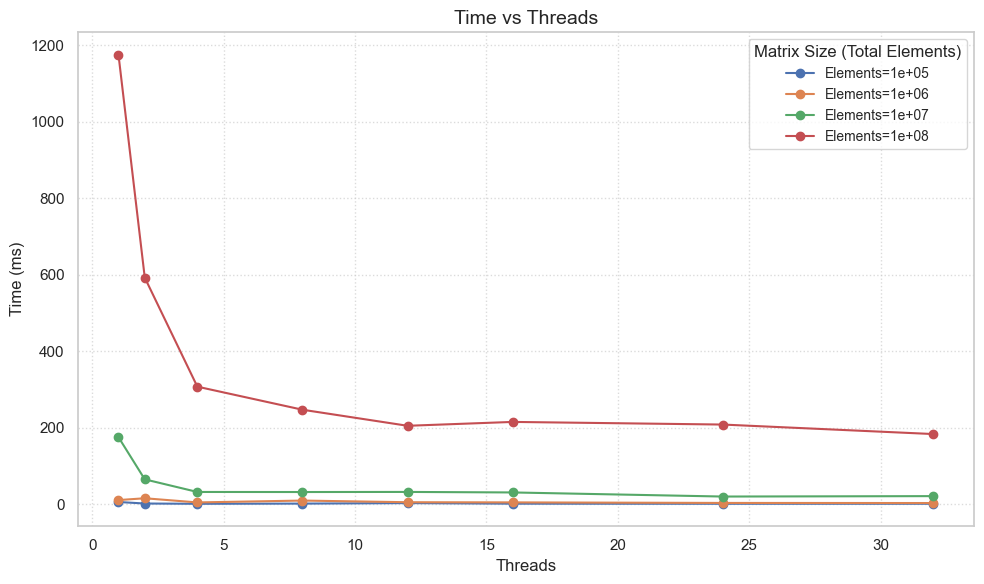

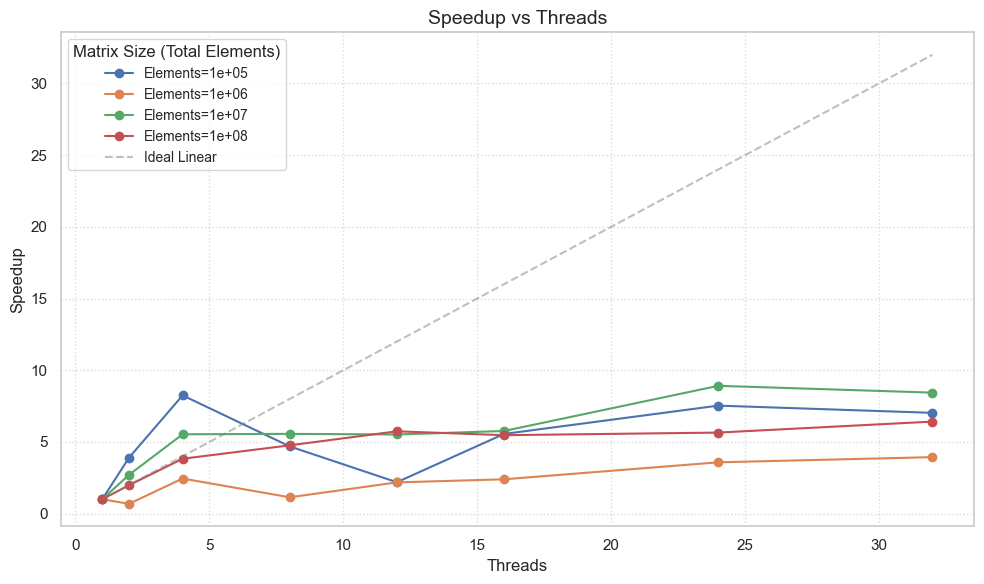

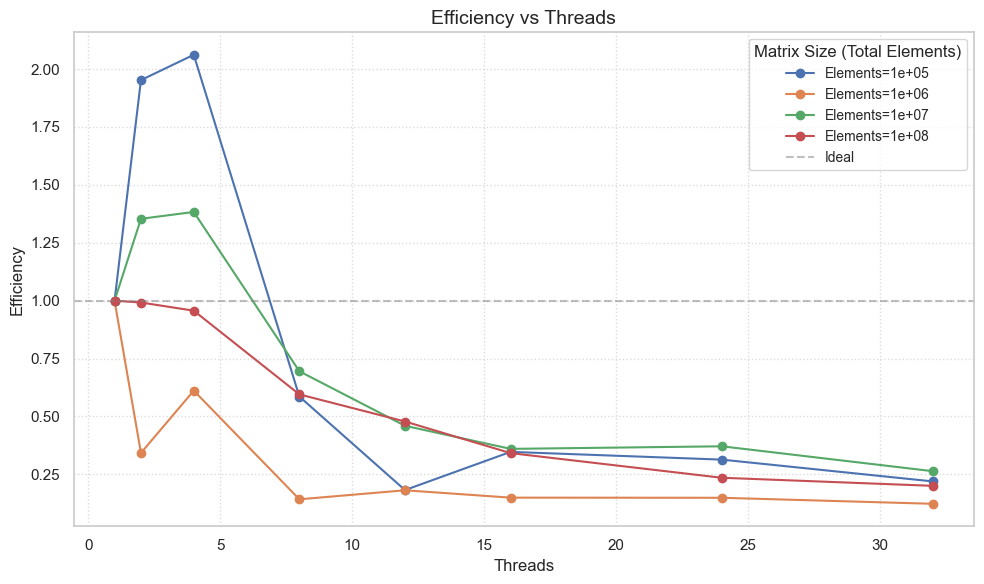

In [7]:
# --- ПОСТРОЕНИЕ ГРАФИКОВ ---
for col_name, ylabel, title in plot_configs:
    plt.figure(figsize=(10, 6))
    
    for s in sizes:
        subset = df[df['Size'] == s].sort_values('Threads')
        plt.plot(subset['Threads'], subset[col_name], marker='o', label=f'Elements={s:.0e}')
    
    if col_name == 'Speedup':
        max_th = df['Threads'].max()
        plt.plot([1, max_th], [1, max_th], '--', color='gray', alpha=0.5, label='Ideal Linear')
    
    elif col_name == 'Efficiency':
        plt.axhline(1.0, linestyle='--', color='gray', alpha=0.5, label='Ideal')

    plt.title(title, fontsize=14)
    plt.xlabel('Threads', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.legend(title='Matrix Size (Total Elements)', fontsize=10)
    
    plt.tight_layout()
    plt.show()